<h1 align='center'>Udacity Nanodegree Project 1</h1>
<h2 align='center'><i><font color='blue'>NYC Subway Ridership and Weather Analysis</font></i></h2>
<h3 align='center'>By: Taylor Somma</h3>
<p> This is a project analyzing data obtained from the NYC subway system and provided by Udacity. The objective of this analyis is to determine what facets of the weather, time of day, and day of week most influence the number of people that ride the subway in NYC. After determining the variables with the strongest correlation we will produce a predictive model using linear regression with gradient descent to best predict the number of subway riders.</p>
</p><b>Sources</b><br>
<a href='http://www.udacity.com'>Udacity</a><br>
<a href='http://pandas.pydata.org/pandas-docs/stable/index.html'>Pandas Documentation</a><br>
<a href='http://abacus.bates.edu/~ganderso/biology/resources/stats_flow_chart_v2014.pdf'>Statistical Test Flowchart</a><br>
<a href='http://www.csse.monash.edu.au/~smarkham/resources/param.htm'>Parametric vs non-parametric data</a><br>

</p>
<p><a href='http://www.magicfilebox.com'>Back to magicfilebox.com</a>

In [1]:
%matplotlib inline

In [2]:
#Set size of plots
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [4]:
improved_dataset = pd.read_csv('improved-dataset/turnstile_weather_v2.csv')
#regular_dataset = pd.read_csv('turnstile_data_master_with_weather.csv')
improved_dataset['meantempi']=improved_dataset['meantempi'].round(decimals=0)

In [5]:
improved_dataset.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.092288,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.910766,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.000000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.000000,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,61.000000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.000000,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,80.000000,17.083333,40.862064,-73.694176


In [6]:
improved_dataset.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly', u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday', u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi', u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi', u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat', u'weather_lon'], dtype='object')

In [7]:
improved_dataset.head(10)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258000,56,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258000,56,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258000,56,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258000,56,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258000,56,7.86,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15,34,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0,30.238333,54,8.25,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19,40,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0,30.238333,54,8.25,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488,118,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0,30.238333,54,8.25,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490,132,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0,30.238333,54,8.25,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231,232,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0,30.238333,54,8.25,40.700348,-73.887177


In [8]:
pivot_1 = pd.pivot_table(improved_dataset,columns='day_week',index='hour',aggfunc=np.mean)
pivot_2 = pd.pivot_table(improved_dataset,index='meantempi',aggfunc=np.mean)
pivot_3 = pd.pivot_table(improved_dataset,index='meanprecipi',aggfunc=np.mean)
pivot_4 = pd.pivot_table(improved_dataset,columns='rain',index='day_week',aggfunc=np.mean)
print 'Min temp: ',improved_dataset['meantempi'].min()
print 'Mean temp: ',improved_dataset['meantempi'].mean()
print 'Max temp: ',improved_dataset['meantempi'].max()
print 'Min precip: ',improved_dataset['meanprecipi'].min()
print 'Mean precip: ',improved_dataset['meanprecipi'].mean()
print 'Max precip: ',improved_dataset['meanprecipi'].max()

Min temp:  49.0
Mean temp:  63.0922882131
Max temp:  80.0
Min precip:  0.0
Mean precip:  0.00461769326362
Max precip:  0.1575


In [9]:
pivot_1.ENTRIESn_hourly

day_week,0,1,2,3,4,5,6
hour,,,,,,,
0,889.673950,1341.702092,1600.429778,1553.824764,1612.522608,1790.108421,1225.341443
4,192.592965,306.079698,339.003151,338.877487,350.583333,329.701994,347.992418
8,1063.412801,1207.877963,1082.971963,1049.712534,1006.063274,272.110942,222.387214
12,3080.615709,3619.568394,3959.696938,3972.372240,3816.129237,1679.344245,1229.798312
16,2266.823830,2535.647210,2577.870213,2651.118393,2849.359275,1880.176842,1541.782095
20,3405.477712,3990.406809,3981.178458,4068.230444,3757.201699,2013.174370,1575.412752


In [10]:
pivot_4.ENTRIESn_hourly

rain,0,1
day_week,,
0,1792.143970,1948.177419
1,2171.126911,2139.860974
2,2313.388767,2280.795255
3,2264.874673,2584.054627
4,2274.958944,2284.644330
5,1388.219575,1317.855422
6,1074.015694,1036.095344


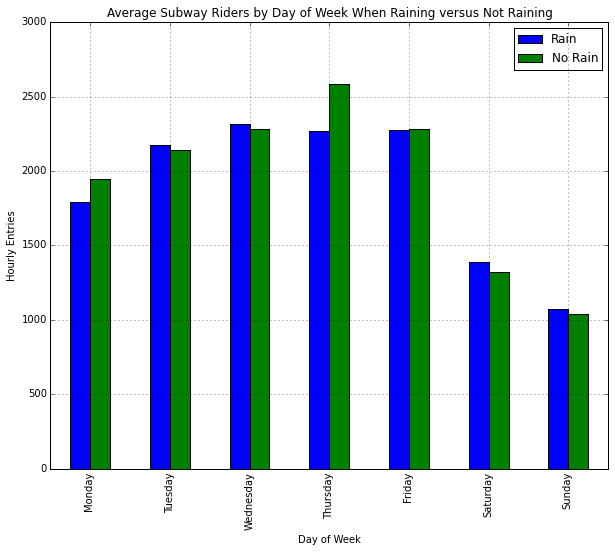

In [24]:
plot_2 = pivot_4['ENTRIESn_hourly'].plot(kind='bar')
plot_2.set_title('Average Subway Riders by Day of Week When Raining versus Not Raining')
plot_2.set_ylabel('Hourly Entries')
plot_2.set_xlabel('Day of Week')
plot_2.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot_2.legend(['Rain','No Rain'])

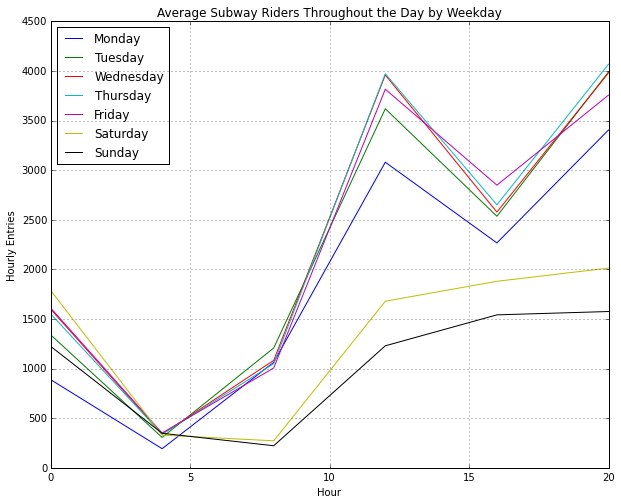

In [12]:
plot_1 = pivot_1['ENTRIESn_hourly'].plot(title='Average Subway Riders Throughout the Day by Weekday')
plot_1.set_ylabel('Hourly Entries')
plot_1.set_xlabel('Hour')
plot_1.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],loc='upper left')

<p><font color=rgb(74, 74, 76)>This graph shows the number or subway riders throughout the day broken down by day of the week. It shows that the number of riders declines in the early morning and increases throughout the day. This chart also shows that the overall number or riders is less during weekends than during the week.<br>I used the pandas <a href='http://pandas.pydata.org/pandas-docs/stable/reshaping.html'>pivot table</a> function coupled with <a href='http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html'>numpy.mean</a> to produce the pivot table this plot was created from</font></p>

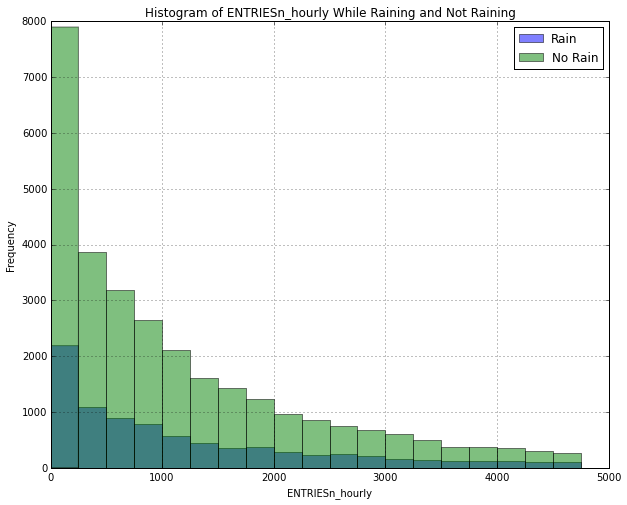

In [32]:
binLabels = []
for x in range(20):
    binLabels.append(x*250)
plt.figure()
plt.title('Histogram of ENTRIESn_hourly While Raining and Not Raining')
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
rainyDays['ENTRIESn_hourly'].hist(bins=binLabels, alpha=0.5,label=['Raining'])
nonRainyDays['ENTRIESn_hourly'].hist(bins=binLabels,alpha=0.5,label=['No Rain'])
plt.legend(['Rain','No Rain'])

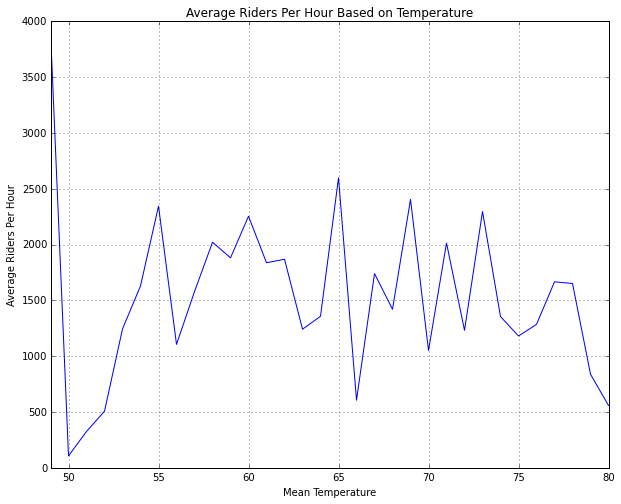

In [14]:
plot_3 = pivot_2['ENTRIESn_hourly'].plot()
plot_3.set_ylabel('Average Riders Per Hour')
plot_3.set_xlabel('Mean Temperature')
plot_3.set_title('Average Riders Per Hour Based on Temperature')

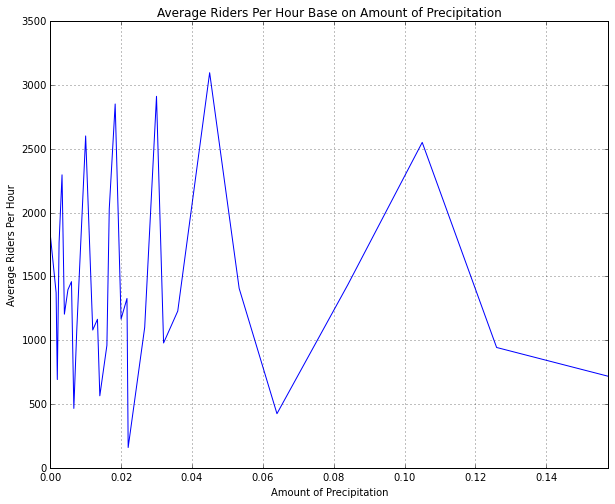

In [15]:
plot_4 = pivot_3['ENTRIESn_hourly'].plot()
plot_4.set_title('Average Riders Per Hour Base on Amount of Precipitation')
plot_4.set_ylabel('Average Riders Per Hour')
plot_4.set_xlabel('Amount of Precipitation')

In [17]:
#dictionary containing all calculated stat variables
stat_dict={}

In [34]:
rainyDays = improved_dataset[improved_dataset['rain']==1]
nonRainyDays = improved_dataset[improved_dataset['rain']==0]
rainy_entries_mean=rainyDays['ENTRIESn_hourly'].mean()
rainy_entries_std = rainyDays['ENTRIESn_hourly'].std()
stat_dict['rainy_entries_mean']=rainy_entries_mean
stat_dict['rainy_entries_std']=rainy_entries_std
not_rainy_entries_mean=nonRainyDays['ENTRIESn_hourly'].mean()
not_rainy_entries_std=nonRainyDays['ENTRIESn_hourly'].std()
stat_dict['not_rainy_entries_mean']=not_rainy_entries_mean
stat_dict['not_rainy_entries_std']=not_rainy_entries_std
print 'Mean riders on rainy days ',rainy_entries_mean
print 'Std Dev riders on rainy days ',rainy_entries_std
print 'Mean riders on non-rainy days ',not_rainy_entries_mean
print 'Std Dev riders on non-rainy days ',not_rainy_entries_std

Mean riders on rainy days  2028.19603547
Std Dev riders on rainy days  3189.43337288
Mean riders on non-rainy days  1845.53943866
Std Dev riders on non-rainy days  2878.77084798


In [35]:
print stat_dict

{'rainy_entries_mean': 2028.1960354720918, 'rainy_entries_std': 3189.433372881625, 'not_rainy_entries_mean': 1845.5394386644084, 'not_rainy_entries_std': 2878.7708479755483}


In [20]:
mannWhitneyOutput = scipy.stats.mannwhitneyu(rainyDays['ENTRIESn_hourly'],nonRainyDays['ENTRIESn_hourly'])

In [21]:
print mannWhitneyOutput
print 'U = ',mannWhitneyOutput[0]
print 'p - ',mannWhitneyOutput[1]

(153635120.5, 2.7410695712437496e-06)
U =  153635120.5
p -  2.74106957124e-06


<p><font color=rgb(72,72,72)><b>A p-value of 2.74e-06 means that we can safely reject the null hypothesis that there is no significant difference between the number of subway riders during rainy days versus not rainy days. The null hypothesis can be rejected because there is only an approximately 2.74e-06 chance of getting a result as extreme as the observed difference in mean ridership if the null hypothesis were true.</b></font></p>

DescribeResult(nobs=42649, minmax=(0.0, 32814.0), mean=1886.5899552158317, variance=8716580.6414166372, skewness=4.025747813992016, kurtosis=23.20878066029205)


In [59]:
weekdays = improved_dataset[improved_dataset['day_week']<=4]
weekends = improved_dataset[improved_dataset['day_week']>4]
monday = improved_dataset[improved_dataset['day_week']==0]
tuesday = improved_dataset[improved_dataset['day_week']==1]
wednesday = improved_dataset[improved_dataset['day_week']==2]
thursday = improved_dataset[improved_dataset['day_week']==3]
friday = improved_dataset[improved_dataset['day_week']==4]
saturday = improved_dataset[improved_dataset['day_week']==5]
sunday = improved_dataset[improved_dataset['day_week']==6]

In [60]:
scipy_describe_weekdays = scipy.stats.describe(weekdays['ENTRIESn_hourly'])
scipy_describe_weekends = scipy.stats.describe(weekends['ENTRIESn_hourly'])
scipy_describe_output = scipy.stats.describe(improved_dataset['ENTRIESn_hourly'])
mann_whitney_u_week_weekend = scipy.stats.mannwhitneyu(weekdays['ENTRIESn_hourly'],weekends['ENTRIESn_hourly'])
print scipy_describe_weekdays
print scipy_describe_weekends
print scipy_describe_output
print 'Mann-Whitney U Test Output ',mann_whitney_u_week_weekend

DescribeResult(nobs=30470, minmax=(0.0, 32814.0), mean=2158.0427305546441, variance=10774939.423097735, skewness=3.716842161584894, kurtosis=19.18144553673818)
DescribeResult(nobs=12179, minmax=(0.0, 26753.0), mean=1207.4565235240989, variance=2921715.0218204306, skewness=3.6383815465432074, kurtosis=20.726320966998294)
DescribeResult(nobs=42649, minmax=(0.0, 32814.0), mean=1886.5899552158317, variance=8716580.6414166372, skewness=4.025747813992016, kurtosis=23.20878066029205)
Mann-Whitney U Test Output  (149803470.0, 5.7803894056584393e-213)


<p> Assuming a null hypothesis stating that subway ridership is the same during the week and weekend, based on the Mann Whitney U Value of 5.78e-213, which is extremely low, we can safely reject this null hypothesis. Therefore there is a statistically significant difference in subway ridership during the week and weekend.</p>

In [64]:
kruskallwallis_days_of_week=scipy.stats.mstats.kruskalwallis(monday['ENTRIESn_hourly'],tuesday['ENTRIESn_hourly'],wednesday['ENTRIESn_hourly'],thursday['ENTRIESn_hourly'],friday['ENTRIESn_hourly'],saturday['ENTRIESn_hourly'],sunday['ENTRIESn_hourly'])
print kruskallwallis_days_of_week

(111.21563514879553, 7.0767145292006105e-25)


<h3>Kruskall Wallis Test</h3>
<p> The above output shows the output for the scipy <a href='http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.kruskalwallis.html'>Kruskall Wallace</a> test which is testing for a significant difference of riders between all days of the week. The output is the H-statistic and the p-value.